In [44]:
# Load modules
import matplotlib.pyplot as plt
import pickle
import numpy as np
import random
import cv2
import os
import re
from keras import layers
from keras import models
from keras import optimizers
from keras.applications import InceptionV3
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [35]:
#target_size = 299 # For inception
target_size = 224 # For vgg

In [36]:
def cropAndReshape(img):
    img_arr = np.asarray(img)
    # Cut lower part (Engine hood)
    remaining = 80
    img2=(img_arr[0:int(img_arr.shape[0]/2+remaining),
             0:img_arr.shape[1]]).copy()
    
    return cv2.resize(img2, (target_size, target_size))

In [37]:
green_light_training_dir_ros1 = os.path.join('ros_bag_1', 'Green')
red_light_training_dir_ros1 = os.path.join('ros_bag_1', 'Red')
yellow_light_training_dir_ros1 = os.path.join('ros_bag_1', 'Yellow')
no_light_training_dir_ros1 = os.path.join('ros_bag_1', 'No_Light')

green_light_training_dir_ros2 = os.path.join('ros_bag_2', 'Green')
red_light_training_dir_ros2 = os.path.join('ros_bag_2', 'Red')
yellow_light_training_dir_ros2 = os.path.join('ros_bag_2', 'Yellow')
no_light_training_dir_ros2 = os.path.join('ros_bag_2', 'No_Light')

In [38]:
x_ros12, predict_ros12 = ([],[])

green_light_training_data_ros1 = [cropAndReshape(load_img(os.path.join(green_light_training_dir_ros1, f))) for f in os.listdir(green_light_training_dir_ros1) if re.match(r'[0-9]+.*\.jpg', f)]
x_ros12.extend(green_light_training_data_ros1)
predict_ros12.extend([0] * len(green_light_training_data_ros1))

red_light_training_data_ros1 = [cropAndReshape(load_img(os.path.join(red_light_training_dir_ros1, f))) for f in os.listdir(red_light_training_dir_ros1) if re.match(r'[0-9]+.*\.jpg', f)]
x_ros12.extend(red_light_training_data_ros1)
predict_ros12.extend([1] * len(red_light_training_data_ros1))

yellow_light_training_data_ros1 = [cropAndReshape(load_img(os.path.join(yellow_light_training_dir_ros1, f))) for f in os.listdir(yellow_light_training_dir_ros1) if re.match(r'[0-9]+.*\.jpg', f)]
x_ros12.extend(yellow_light_training_data_ros1)
predict_ros12.extend([2] * len(yellow_light_training_data_ros1))

no_light_training_data_ros1 = [cropAndReshape(load_img(os.path.join(no_light_training_dir_ros1, f))) for f in os.listdir(no_light_training_dir_ros1) if re.match(r'[0-9]+.*\.jpg', f)]
x_ros12.extend(no_light_training_data_ros1)
predict_ros12.extend([3] * len(no_light_training_data_ros1))

green_light_training_data_ros2 = [cropAndReshape(load_img(os.path.join(green_light_training_dir_ros2, f))) for f in os.listdir(green_light_training_dir_ros2) if re.match(r'[0-9]+.*\.jpg', f)]
x_ros12.extend(green_light_training_data_ros2)
predict_ros12.extend([0] * len(green_light_training_data_ros2))

red_light_training_data_ros2 = [cropAndReshape(load_img(os.path.join(red_light_training_dir_ros2, f))) for f in os.listdir(red_light_training_dir_ros2) if re.match(r'[0-9]+.*\.jpg', f)]
x_ros12.extend(red_light_training_data_ros2)
predict_ros12.extend([1] * len(red_light_training_data_ros2))

yellow_light_training_data_ros2 = [cropAndReshape(load_img(os.path.join(yellow_light_training_dir_ros2, f))) for f in os.listdir(yellow_light_training_dir_ros2) if re.match(r'[0-9]+.*\.jpg', f)]
x_ros12.extend(yellow_light_training_data_ros2)
predict_ros12.extend([2] * len(yellow_light_training_data_ros2))

no_light_training_data_ros2 = [cropAndReshape(load_img(os.path.join(no_light_training_dir_ros2, f))) for f in os.listdir(no_light_training_dir_ros2) if re.match(r'[0-9]+.*\.jpg', f)]
x_ros12.extend(no_light_training_data_ros2)
predict_ros12.extend([3] * len(no_light_training_data_ros2))

print(np.shape(x_ros12))
y_ros12 = to_categorical(np.array(predict_ros12), 4)
print(np.shape(y_ros12))

(5882, 224, 224, 3)
(5882, 4)


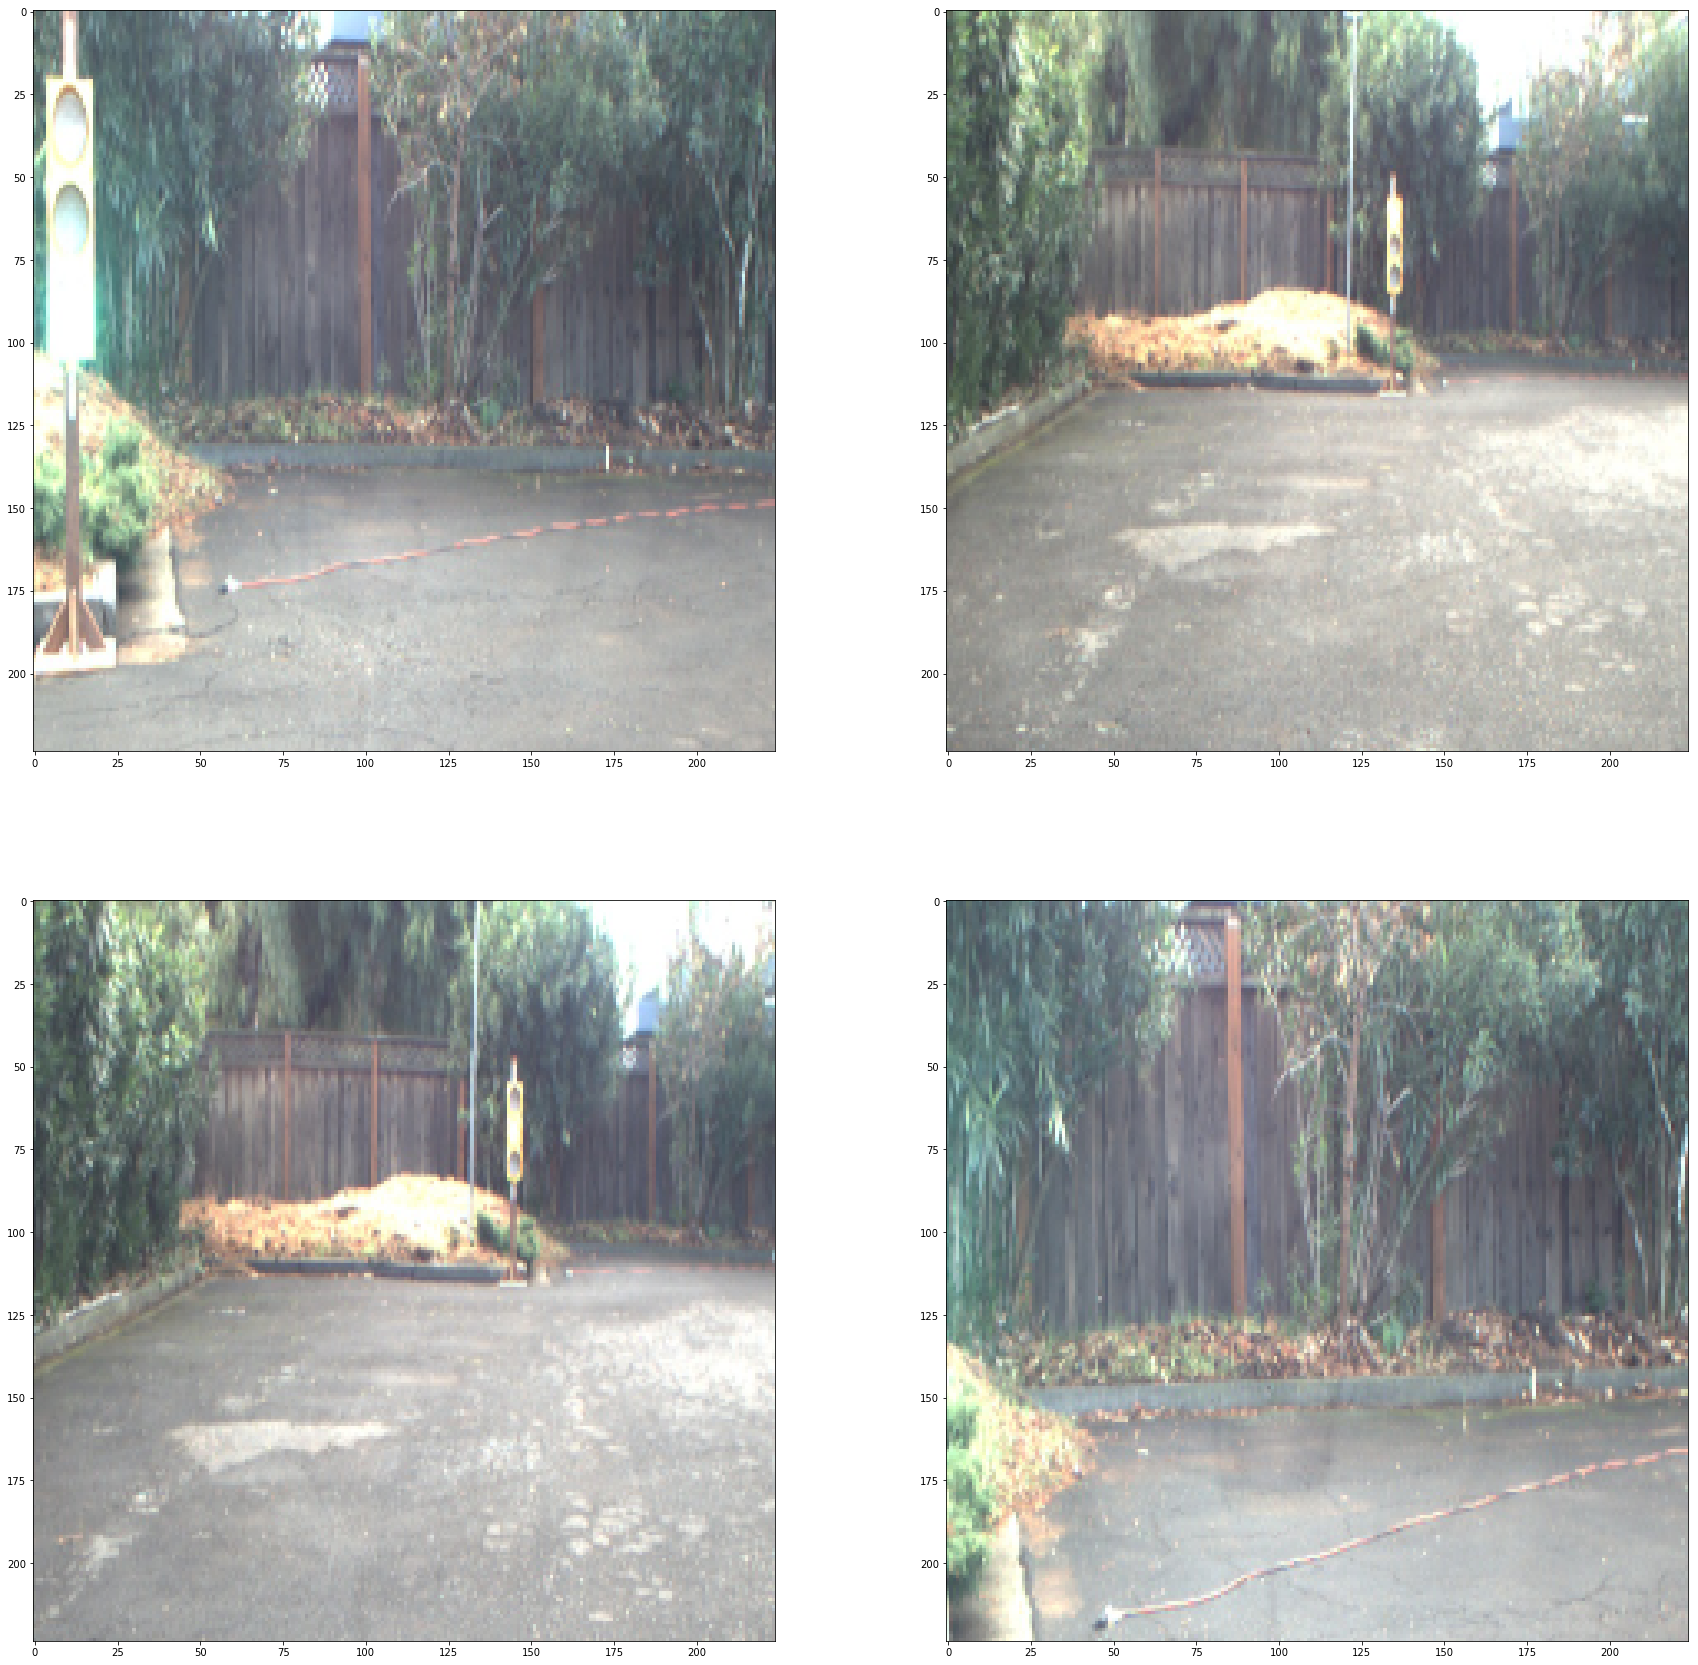

In [39]:
plt.figure(figsize=(30,30))
plt.subplot(2, 2, 1)
plt.imshow(green_light_training_data_ros1[0])
plt.subplot(2, 2, 2)
plt.imshow(red_light_training_data_ros1[0])
plt.subplot(2, 2, 3)
plt.imshow(yellow_light_training_data_ros1[0])
plt.subplot(2, 2, 4)
plt.imshow(no_light_training_data_ros1[0])
plt.show()

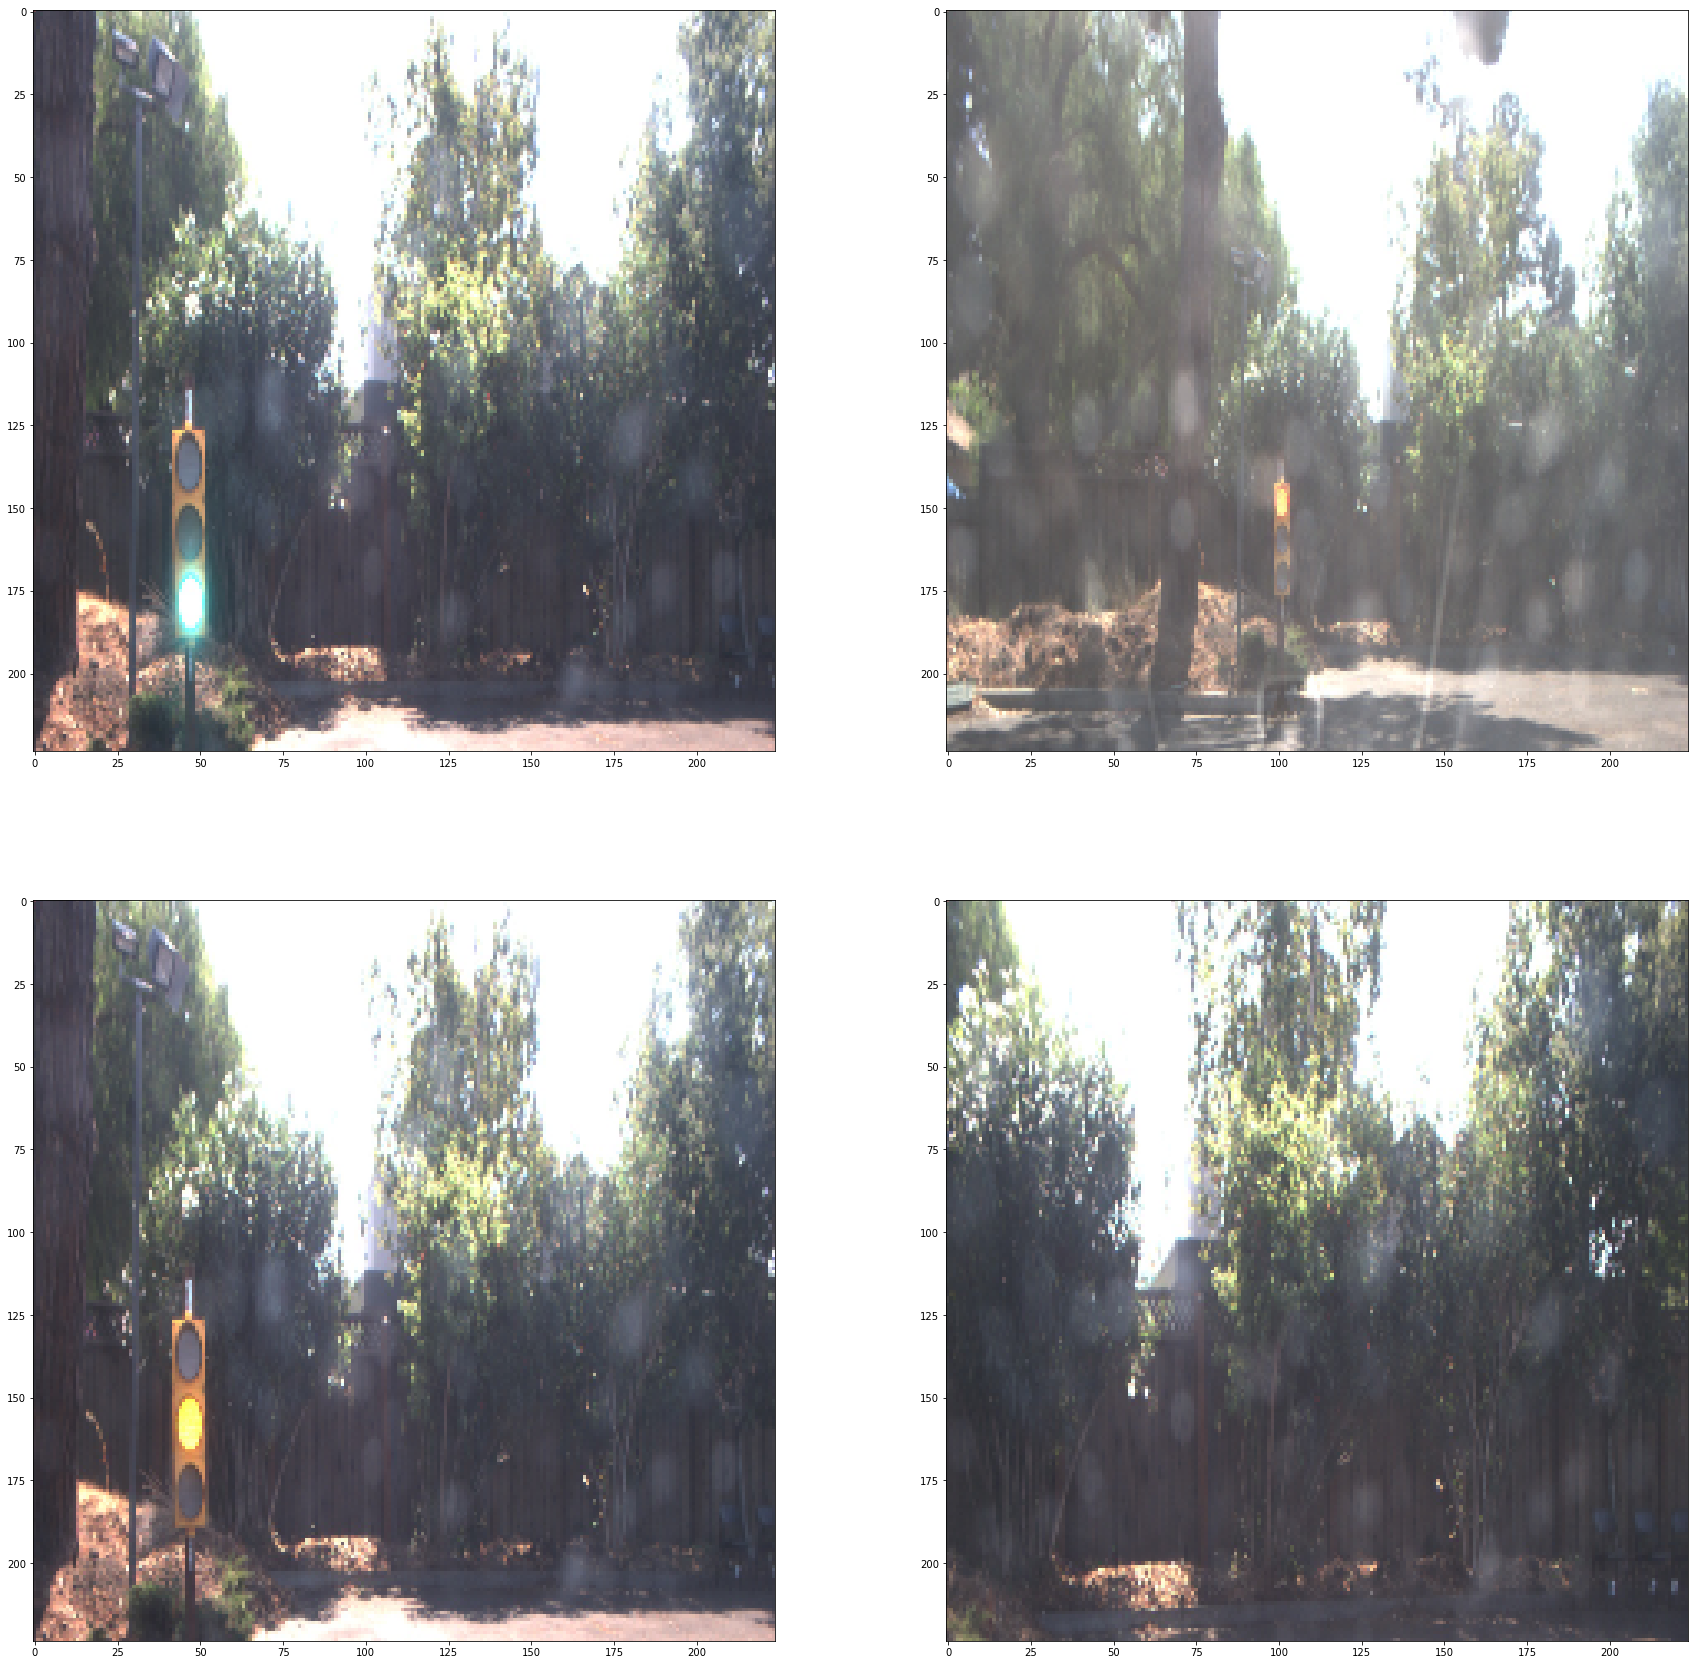

In [40]:
plt.figure(figsize=(30,30))
plt.subplot(2, 2, 1)
plt.imshow(green_light_training_data_ros2[10])
plt.subplot(2, 2, 2)
plt.imshow(red_light_training_data_ros2[10])
plt.subplot(2, 2, 3)
plt.imshow(yellow_light_training_data_ros2[10])
plt.subplot(2, 2, 4)
plt.imshow(no_light_training_data_ros2[10])
plt.show()

In [41]:
# Split image paths and category into training, validation and test sets
images_train12, images_test12, labels_train12, labels_test12 = train_test_split(x_ros12, y_ros12, test_size=0.05, random_state=42)
images_train12, images_valid12, labels_train12, labels_valid12 = train_test_split(images_train12, labels_train12, test_size=0.15, random_state=42)

print('Training data size:', np.shape(images_train12))
print('Validation data size:', np.shape(images_valid12))
print('Testing data size:', np.shape(images_test12))

print('Training label size:', np.shape(labels_train12))
print('Validation label size:', np.shape(labels_valid12))
print('Testing label size:', np.shape(labels_test12))

Training data size: (4748, 224, 224, 3)
Validation data size: (839, 224, 224, 3)
Testing data size: (295, 224, 224, 3)
Training label size: (4748, 4)
Validation label size: (839, 4)
Testing label size: (295, 4)


In [42]:
def data_generator12(images, labels, batch_size):
    x, predict = ([],[])
    images, labels = shuffle(images, labels)
    while True:
        for i in range(len(labels)):
            img = images[i]
            label = labels[i]
            x.append(img)
            predict.append(label)
            if len(x) == batch_size:
                yield (np.array(x), np.array(predict))
                x, predict = ([],[])
                images, labels = shuffle(images, labels)
            # Flip to enrich training data
            x.append(cv2.flip(img, 1))
            predict.append(label)
            if len(x) == batch_size:
                yield (np.array(x), np.array(predict))
                x, predict = ([],[])
                images, labels = shuffle(images, labels)

In [31]:
#print(target_size)
#inception_base = InceptionV3(weights=None,
                  #include_top=True, pooling=None,
                  #input_shape=(target_size,target_size,3), classes=4)
#inception_base.summary() https://github.com/tensorflow/tensorflow/issues/1355

299
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 299, 299, 3)   0                                            
____________________________________________________________________________________________________
conv2d_283 (Conv2D)              (None, 149, 149, 32)  864         input_4[0][0]                    
____________________________________________________________________________________________________
batch_normalization_283 (BatchNo (None, 149, 149, 32)  96          conv2d_283[0][0]                 
____________________________________________________________________________________________________
activation_283 (Activation)      (None, 149, 149, 32)  0           batch_normalization_283[0][0]    
_______________________________________________________________________________________

In [46]:
vgg19 = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(224,224,3))

In [47]:
model12 = models.Sequential()
model12.add(vgg19)
model12.add(layers.Flatten())
model12.add(layers.Dense(256, activation='relu'))
model12.add(layers.Dense(4, activation='softmax'))
model12.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 1028      
Total params: 26,448,196
Trainable params: 26,448,196
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Fine-tune model with very small learning rate
model12.compile(optimizer=optimizers.RMSprop(lr=2e-5),
            loss='categorical_crossentropy',
            metrics=['acc'])
generator12 = data_generator12(images_train12, labels_train12, 10) # large batch size causes https://github.com/tensorflow/tensorflow/issues/1355
validation_generator12 = data_generator12(images_valid12, labels_valid12, 10)
for inputs_batch, labels_batch in generator12:
    print(np.shape(inputs_batch))
    print(np.shape(labels_batch))
    print(np.shape(inputs_batch[0]))
    print(labels_batch[0])
    break;
for inputs_batch, labels_batch in validation_generator12:
    print(np.shape(inputs_batch))
    print(np.shape(labels_batch))
    print(np.shape(inputs_batch[0]))
    print(labels_batch[0])
    break;

(10, 224, 224, 3)
(10, 4)
(224, 224, 3)
[ 1.  0.  0.  0.]
(10, 224, 224, 3)
(10, 4)
(224, 224, 3)
[ 0.  0.  1.  0.]


In [49]:
history = model12.fit_generator(generator12, 
                              validation_data = validation_generator12,
                              steps_per_epoch=50, # Total number of steps (batches of samples) to yield from generator before declaring one epoch finished and starting the next epoch.
                              epochs=30,
                              validation_steps=10, # Total number of steps (batches of samples) to validate before stopping.
                              verbose=1)

Epoch 1/30
50/50 [==============================] - 107s - loss: 2.1336 - acc: 0.4220 - val_loss: 1.3207 - val_acc: 0.3700
Epoch 2/30
50/50 [==============================] - 95s - loss: 1.1177 - acc: 0.5140 - val_loss: 0.9451 - val_acc: 0.5800
Epoch 3/30
50/50 [==============================] - 95s - loss: 0.9361 - acc: 0.5900 - val_loss: 1.0511 - val_acc: 0.5300
Epoch 4/30
50/50 [==============================] - 95s - loss: 0.8254 - acc: 0.6520 - val_loss: 0.9154 - val_acc: 0.5800
Epoch 5/30
50/50 [==============================] - 95s - loss: 0.8865 - acc: 0.6100 - val_loss: 0.6972 - val_acc: 0.6600
Epoch 6/30
50/50 [==============================] - 95s - loss: 0.7319 - acc: 0.7020 - val_loss: 0.7397 - val_acc: 0.6900
Epoch 7/30
50/50 [==============================] - 95s - loss: 0.5610 - acc: 0.7740 - val_loss: 1.2776 - val_acc: 0.5700
Epoch 8/30
50/50 [==============================] - 95s - loss: 0.5161 - acc: 0.8040 - val_loss: 0.2673 - val_acc: 0.8800
Epoch 9/30
50/50 [=====

In [50]:
model12_file = 'vgg19_based_ros12_trained.h5'
#model12_weight_file = 'vgg19_based_ros12_trained.h5'
model12.save(model12_file)
#model12.save_weights(model12_weight_file)

In [60]:
test_generator12 = data_generator12(images_test12, labels_test12, 10)
print(model12.evaluate_generator(test_generator12, steps=10))

[0.00010463322249023576, 1.0]


In [61]:
print(model12_file)
model12_loaded = load_model(model12_file)
model12_loaded.summary()

vgg19_based_ros12_trained.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 1028      
Total params: 26,448,196
Trainable params: 26,448,196
Non-trainable params: 0
_________________________________________________________________


In [62]:
print(model12_loaded.evaluate_generator(test_generator12, steps=10))

[0.0053235005739054484, 1.0]


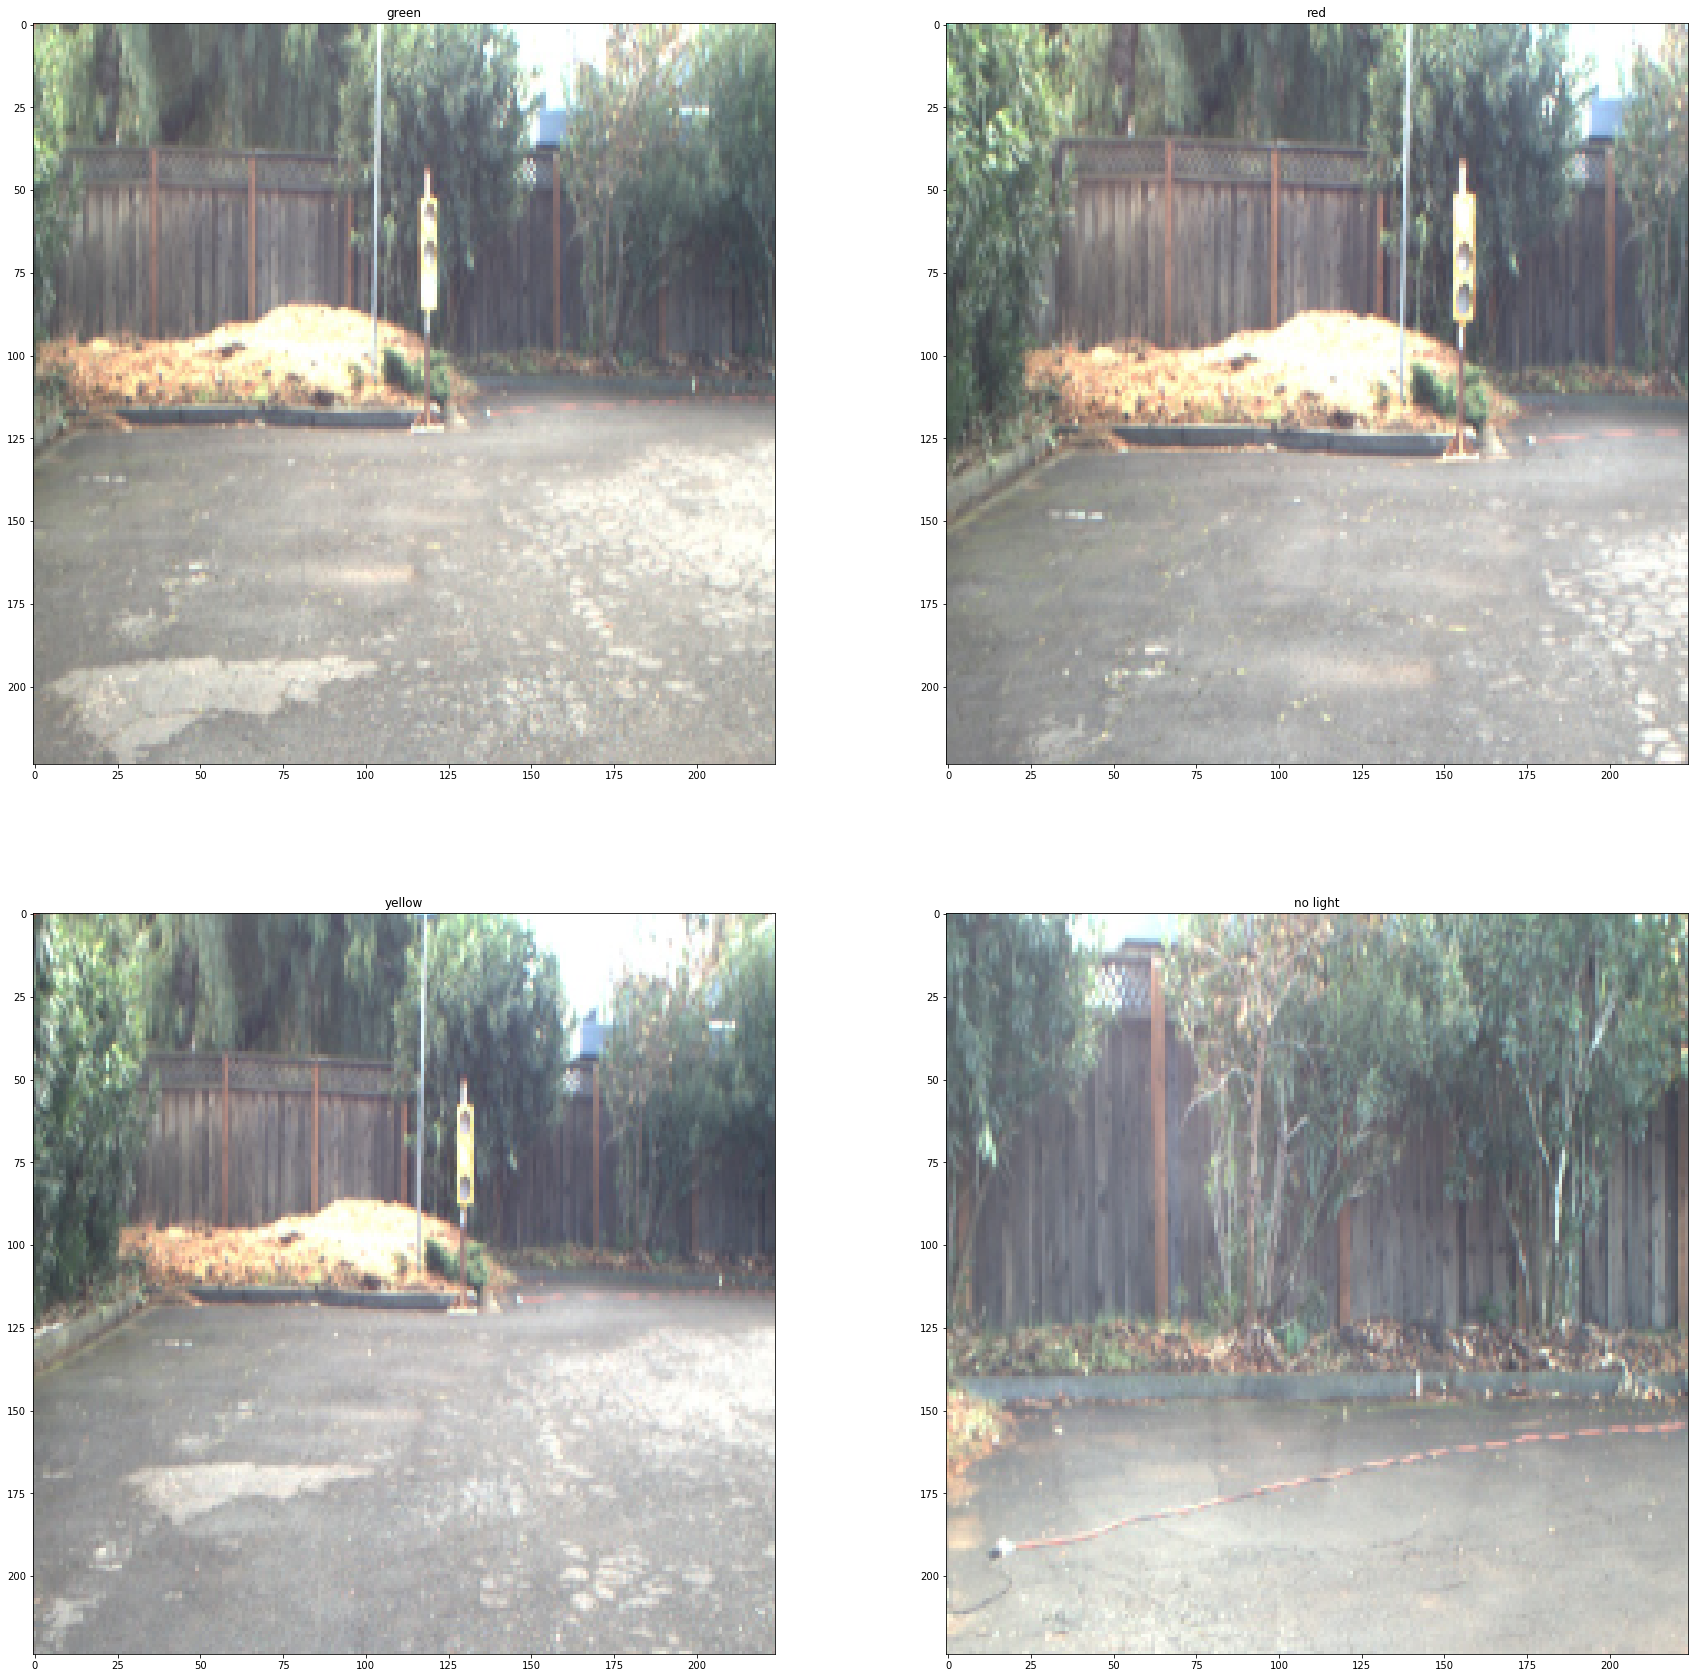

In [63]:
predicted = ['green', 'red', 'yellow', 'no light']
state = model12_loaded.predict(np.expand_dims(green_light_training_data_ros1[10], axis=0))
idx = np.argmax(state)
plt.figure(figsize=(30,30))
plt.subplot(2, 2, 1)
plt.title(predicted[idx])
plt.imshow(green_light_training_data_ros1[10])


state = model12_loaded.predict(np.expand_dims(red_light_training_data_ros1[10], axis=0))
idx = np.argmax(state)
plt.subplot(2, 2, 2)
plt.title(predicted[idx])
plt.imshow(red_light_training_data_ros1[10])


state = model12_loaded.predict(np.expand_dims(yellow_light_training_data_ros1[10], axis=0))
idx = np.argmax(state)
plt.subplot(2, 2, 3)
plt.title(predicted[idx])
plt.imshow(yellow_light_training_data_ros1[10])


state = model12_loaded.predict(np.expand_dims(no_light_training_data_ros1[10], axis=0))
idx = np.argmax(state)
plt.subplot(2, 2, 4)
plt.title(predicted[idx])
plt.imshow(no_light_training_data_ros1[10])

plt.show()

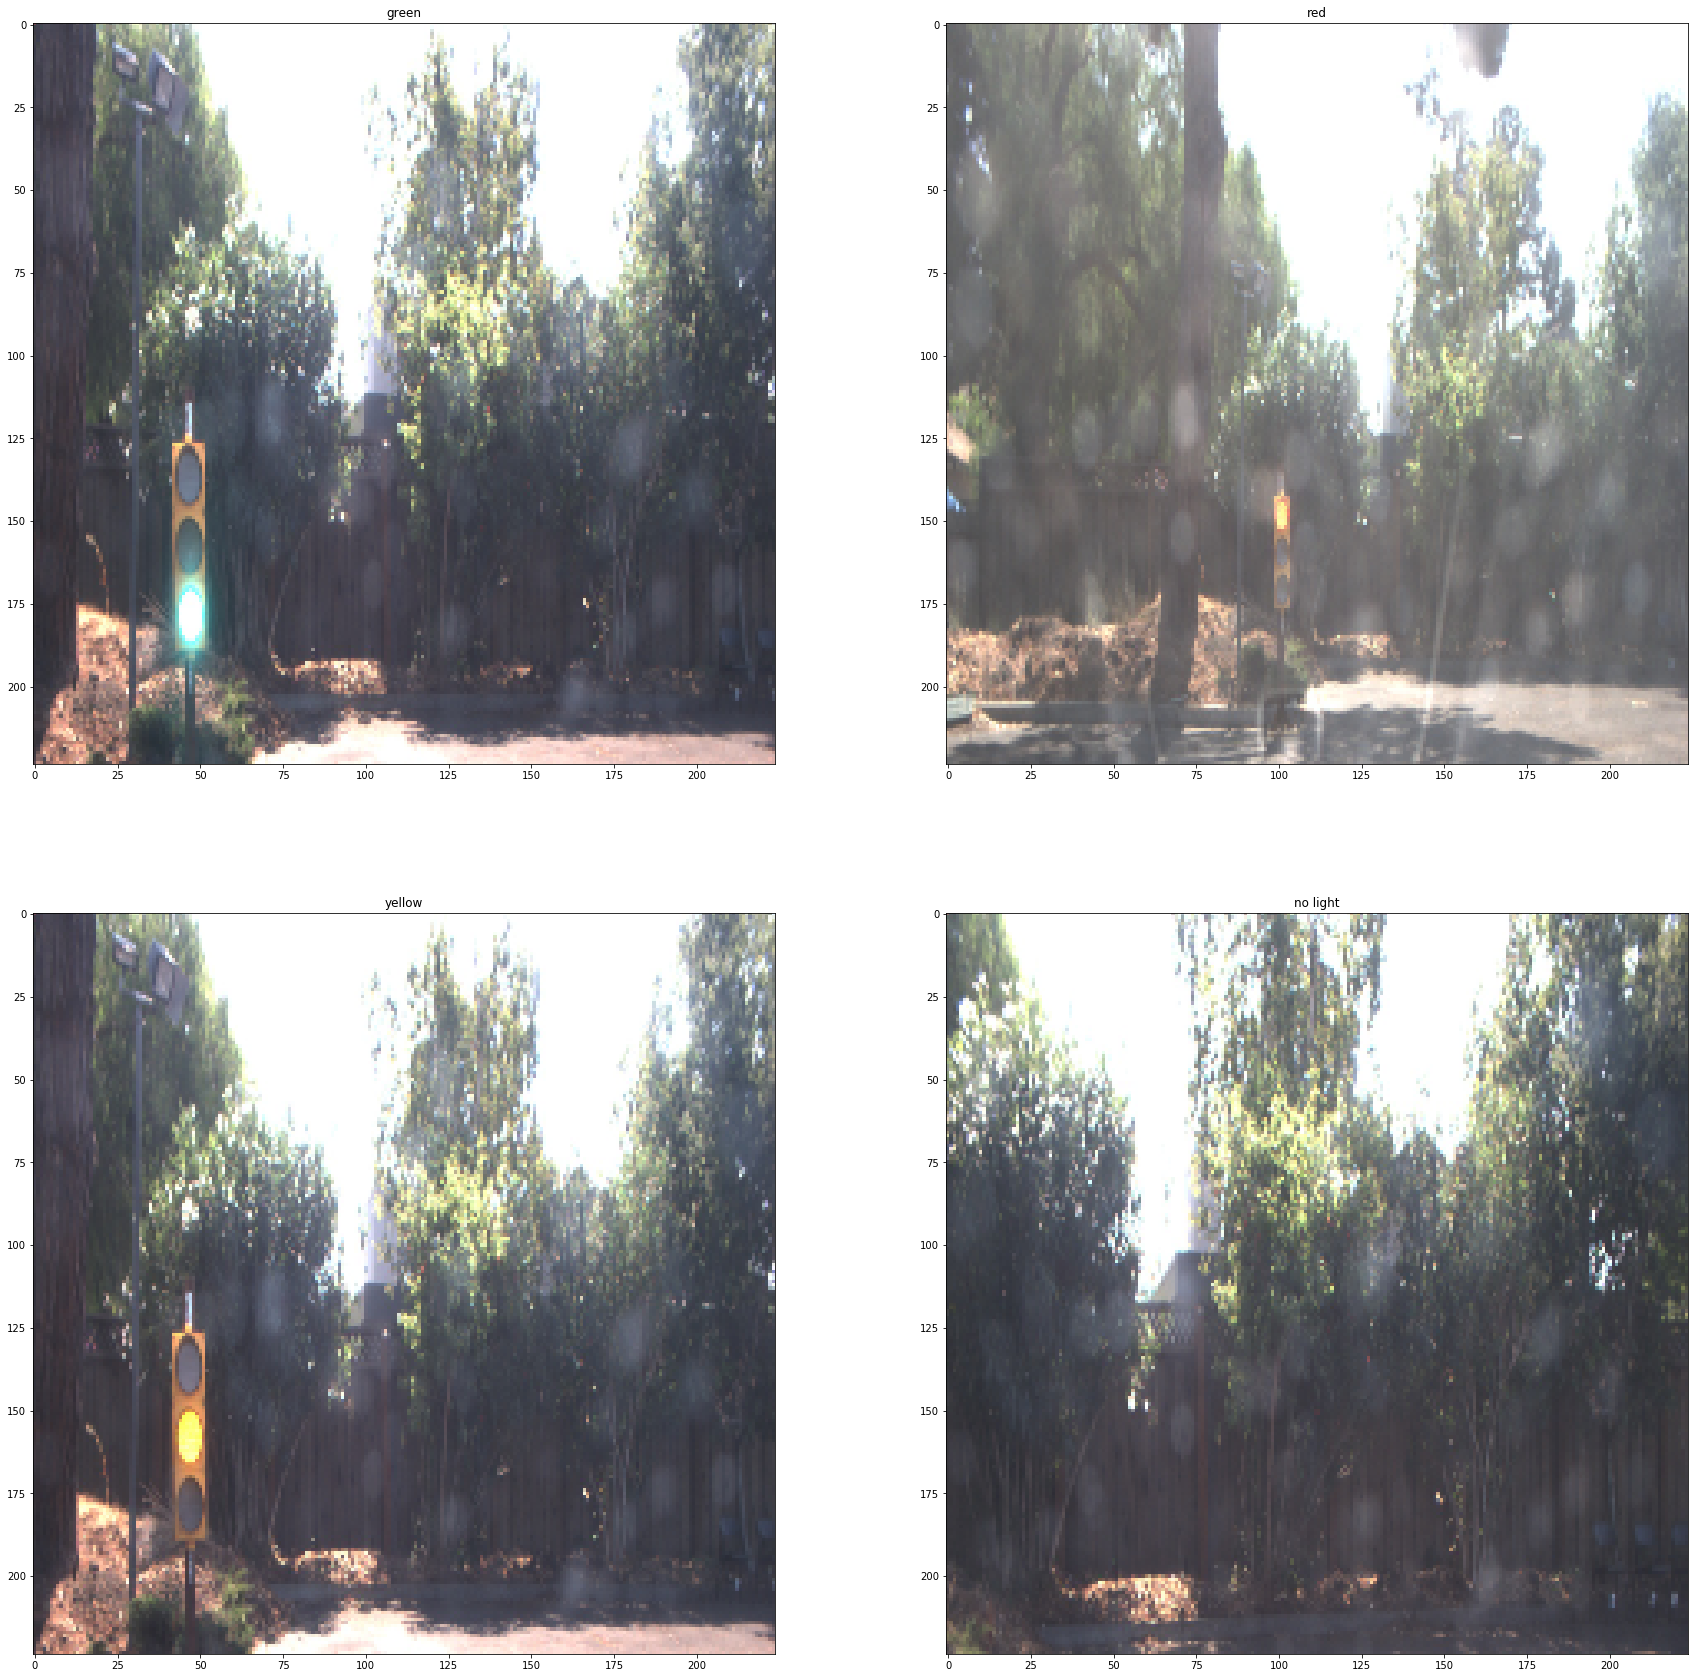

In [64]:
state = model12_loaded.predict(np.expand_dims(green_light_training_data_ros2[10], axis=0))
idx = np.argmax(state)
plt.figure(figsize=(30,30))
plt.subplot(2, 2, 1)
plt.title(predicted[idx])
plt.imshow(green_light_training_data_ros2[10])


state = model12_loaded.predict(np.expand_dims(red_light_training_data_ros2[10], axis=0))
idx = np.argmax(state)
plt.subplot(2, 2, 2)
plt.title(predicted[idx])
plt.imshow(red_light_training_data_ros2[10])


state = model12_loaded.predict(np.expand_dims(yellow_light_training_data_ros2[10], axis=0))
idx = np.argmax(state)
plt.subplot(2, 2, 3)
plt.title(predicted[idx])
plt.imshow(yellow_light_training_data_ros2[10])


state = model12_loaded.predict(np.expand_dims(no_light_training_data_ros2[10], axis=0))
idx = np.argmax(state)
plt.subplot(2, 2, 4)
plt.title(predicted[idx])
plt.imshow(no_light_training_data_ros2[10])

plt.show()